## Datenvisualisierung
Die Datenvisualisierung findet in Python in der Regel über die Bibliothek **matplotlib** statt. Diese muss in einem Consolen-Fenster über Python installiert werden. Der Befehl dazu lautet "pip install matplotlib".

In [7]:
# Erneutes Laden der Daten (Siehe "0 Datenaufbereitung") 

# Per Definition als Array
x = [1,2,3,4,5,6,7,8,9]
y = [1,4,9,16,25,36,49,64,81]

# In einen Pandas DataFrame aus einer Date
# pandas muss zuvor mit "pip install pandas" installiert werden
import pandas
x_square = pandas.read_csv('data/x_square.csv')

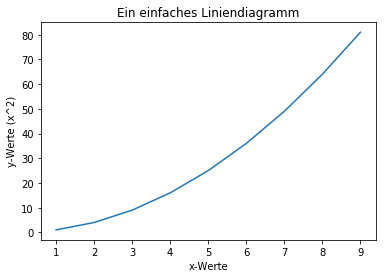

In [46]:
# Einfache Darstellung der Werte im x- und im y-Array in einem Liniendiagramm
import matplotlib.pyplot as plt
plt.title("Ein einfaches Liniendiagramm")
plt.plot(x,y)
plt.xlabel("x-Werte")
plt.ylabel("y-Werte (x^2)")
plt.show()

### Verschiedene Linientypen
Der Typ des Diagramms kann vielfältig verändert werden. Der Parameter "fmt" (3. Stelle im Aufruf von "plot") wird hier spezifiziert durch r=red und o=Punkt. Auch auszuprobieren wären etwa "b+", "g^" oder "y-"

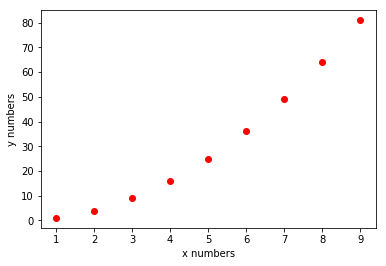

In [51]:
plt.plot(x,y,'ro')
plt.xlabel("x numbers")
plt.ylabel("y numbers")
plt.show()

### Darstellung mehrerer Werte in einem Diagramm
Mehrere Werte können in einem Diagramm dargestellt werden, indem Kombinationen aus x,y und Formatwert aneinandergehängt werden (im folgenden Beispiel ist eine besser lesbare Version dieses Aufrufs zu sehen).

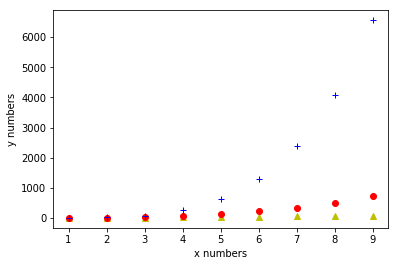

In [19]:
# Über die Bibliothek "numpy" (zu installieren über "pip install numpy") werden aus dem Array "x" drei neue Arrays
# generiert, die jeweils x^2, x^3 und x^4 bilden. Diese werden unter den Namen y1,y2,y3 gespeichert. Deren Länge
# entspricht der Länge von x.
import numpy as np
y1 = np.power(x, 2)
y2 = np.power(x, 3)
y3 = np.power(x, 4)

# Es werden alle drei Wertepaare in einem Aufruf von "plot" gezeichnet. Eine leserliche Version dieses Aufrufs
# folgt.
plt.plot(x, y1, 'y^', x, y2, 'ro', x, y3, 'b+')
plt.xlabel("x numbers")
plt.ylabel("y numbers")
plt.show()

### Hinzufügen einer Legende
Es ist ebenso möglich eine Legende hinzuzufügen, um die Diagramme besser lesbar zu machen. Der Übersichtlichkeit halber werden die einzelen Daten hier in drei Aufrufe von "plot" getrennt.

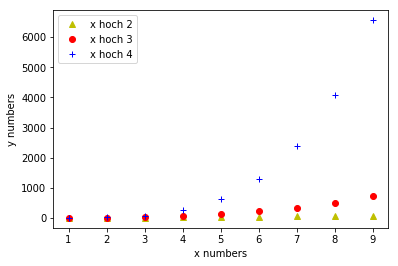

In [18]:
plt.plot(x, y1,'y^', label='x hoch 2');
plt.plot(x, y2, 'ro', label='x hoch 3');
plt.plot(x, y3, 'b+', label='x hoch 4');
plt.xlabel("x numbers")
plt.ylabel("y numbers")
plt.legend()
plt.show()

### Diagramme aus einem Pandas DataFrame
Ebenso wie aus Arrays können auch aus DataFrames schnell Diagramme erstellt werden.

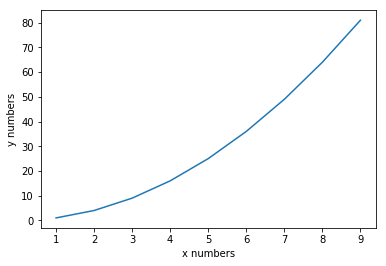

In [52]:
# Statt des Arrays (x oder y) wird die Spalte aus dem DataFrame angegeben. Diese wird über deren Namen
# in eckigen Klammern referenziert.
plt.plot(x_square['x'],x_square['y'])
plt.xlabel("x numbers")
plt.ylabel("y numbers")
plt.show()

## Verschiedene Diagrammtypen
Neben Liniendiagrammen können von maptplotlib viele verschiedene Diagrammtypen abgebildet werden.

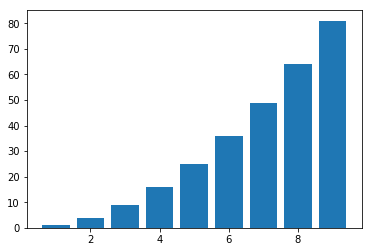

In [8]:
# Anzeige eines Bar-Charts
plt.bar(x,y)
plt.show()

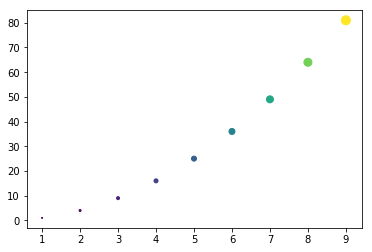

In [12]:
# Ein Scappter-Plot mit den Parametern s(size) und c(color)
plt.scatter(x,y,s=y, c=y)
plt.show()

### Zusammenfassen mehrerer Diagramme
Mehrere Diagramme können gebündelt dargestellt werden.

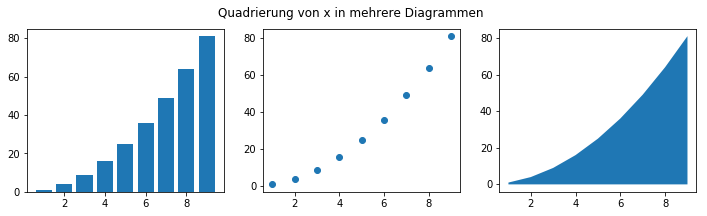

In [37]:
plt.figure(1, figsize=(12,3)) # Erzeugen einer neuen Diagrammgruppe mit fester Größe (12 breit, 3 hoch)
plt.subplot(1,3,1) # Die Diagrammgruppe hat eine Zeile und 3 Spalten. Es wird das erste Diagramm referenziert.
plt.bar(x,y)
plt.subplot(1,3,2) # Die Diagrammgruppe hat eine Zeile und 3 Spalten. Es wird das zweite Diagramm referenziert.
plt.scatter(x,y)
plt.subplot(1,3,3)
plt.fill_between(x, 0, y) # fill_between füllt den Bereich von x bis 0 mit Farbe.
plt.suptitle("Quadrierung von x in mehrere Diagrammen")
plt.show()

### Texte zu Diagrammen hinzufügen
Texte können in beliebiger Form zu einem Diagramm hinzugefügt werden.

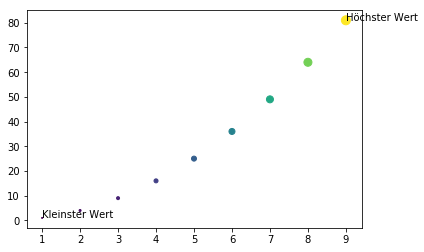

In [54]:
plt.scatter(x,y,s=y, c=y)

# Die Position, an der der Text erscheint, wird durch den Wert des jeweiligen Datenpunktes bestimmt.
plt.text(x[0], y[0], "Kleinster Wert")
plt.text(x[8], y[8], "Höchster Wert")
plt.show()

### Darstellen von Landkarten mit Cartopy
Für die Darstellung von Landkarten mit matplotlib empfielt sich die Bibliothek cartopy. Diese muss mit pip installiert werden.

Anschließend werden sogenannte Shapefiles für die jeweilige Region benötigt. Diese können hier heruntergeladen werden:
https://gadm.org/download_country_v3.html

Die entpackten Daten liegen in diesem Tutorial unter data/cartopy/germany

Da cartopy nicht über pip verfügbar ist, muss es über conda installiert werden:

conda install -c conda-forge cartopy

Anzahl der Bundesländer: 16


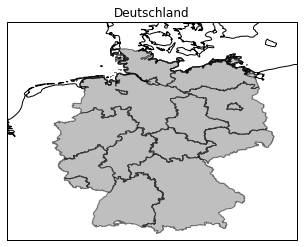

In [69]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt

# Der Detailgrad der Landkarte kann über die Nummer am Ende des Dateinahmen erhöht werden.
shape = 'data/cartopy/germany/gadm36_DEU_1.shp' # 1 = Ebene Bundesländer

# Laden der Shapes in einzelne Polygone
shapes = list(shpreader.Reader(shape).geometries())

# Metainformationen für einzelne Shapes
records = list(shpreader.Reader(shape).records())

print("Anzahl der einzelnen Shapes (Bundesländer): " + str(len(records)))

ax = plt.axes(projection=ccrs.PlateCarree())

plt.title('Deutschland')
ax.coastlines(resolution='10m')

ax.add_geometries(shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='gray', alpha=0.5)

ax.set_extent([4, 16, 47, 56], ccrs.PlateCarree())

plt.show()

### Highlighten einzelner Gebiete auf Landkarten
Einzelne Bereiche können auf Landkarten hervorgehoben werden.

{'GID_0': 'DEU', 'NAME_0': 'Germany', 'GID_1': 'DEU.1_1', 'NAME_1': 'Baden-Württemberg', 'NL_NAME_1': '', 'GID_2': 'DEU.1.1_1', 'NAME_2': 'Alb-Donau-Kreis', 'VARNAME_2': '', 'NL_NAME_2': '', 'TYPE_2': 'Landkreis', 'ENGTYPE_2': 'District', 'CC_2': '08425', 'HASC_2': 'DE.BW.AD'}
Ohne 358 mit: 45 gesamt: 403


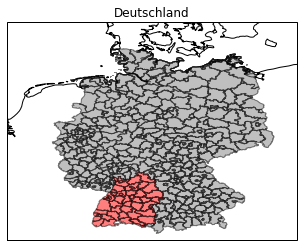

In [85]:
# Der Detailgrad der Landkarte kann über die Nummer am Ende des Dateinahmen erhöht werden.
shape = 'data/cartopy/germany/gadm36_DEU_2.shp'
#shape = 'data/cartopy/germany/gadm36_DEU_4.shp'

# Laden der Shapes in einzelne Polygone
records = list(shpreader.Reader(shape).records())

print(records[0].attributes)

ax = plt.axes(projection=ccrs.PlateCarree())

plt.title('Deutschland')
ax.coastlines(resolution='10m')

# Aufteilen der Umrisse, entweder 50:50 oder nach Bundesland (Achtung: Attribute des Records beachten)
# shapes_normal = shapes[:len(shapes)//2]
# shapes_highlight = shapes[len(shapes)//2:]
shapes_highlight_2 = [s.geometry for s in records if s.attributes['NAME_1'] == 'Baden-Württemberg']
shapes_normal_2 = [s.geometry for s in records if s.attributes['NAME_1'] != 'Baden-Württemberg']

print("Ohne " + str(len(shapes_normal_2)) + " mit: " + str(len(shapes_highlight_2)) + " gesamt: " + str(len(records)))


# Es werden nun zwei Geometrielisten mit unterschiedlichen Farben hinzugefügt.
ax.add_geometries(shapes_normal_2, ccrs.PlateCarree(), edgecolor='black', facecolor='gray', alpha=0.5)
ax.add_geometries(shapes_highlight_2, ccrs.PlateCarree(), edgecolor='black', facecolor='red', alpha=0.5)

ax.set_extent([4, 16, 47, 56], ccrs.PlateCarree())

plt.show()